0.5400390625 0.3645833333333333 0.111328125 0.21354166666666666


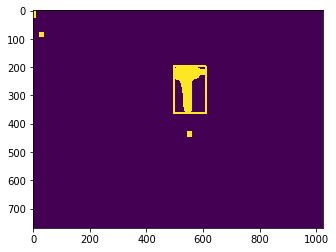

In [3]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import pickle
import os
%matplotlib inline

img = cv2.imread('/home/e/Desktop/newtrain/img/screwdriver1.jpg')

classdict = {
    0 : "screwdriver",
    1 : "wrenches"
}

def removegreen(image):
    ## convert to hsv
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    ## mask of green (36,0,0) ~ (70, 255,255)
    mask = cv2.inRange(hsv, (40, 0, 0), (80, 255,255))

    ## slice the green
    imask = mask>0

    # set the green screen to a value
    image[imask] = 0

    return image

def generatebox(img):
    
    imgh,imgw,_ = img.shape
    
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # noise removal
    kernel = np.ones((3,3),np.uint8)
    
    out = cv2.dilate(gray,kernel,iterations = 8)
    out = cv2.morphologyEx(out,cv2.MORPH_OPEN,kernel, iterations = 3)
    
    ret,thresh = cv2.threshold(out,10,255,0)
    im2, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    

    idx = 0
    
    xmax = 0
    ymax = 0

    xmin = 20000
    ymin = 20000
    
    
    for cnt in contours:
        idx += 1
        #print(idx)
        x,y,w,h = cv2.boundingRect(cnt)
        if(w*h>1800):
            if (x<xmin):
                xmin = x
            if (y<ymin):
                ymin = y
            if ((x+w)>xmax):
                xmax = x+w
                wmax = w
            if ((y+h)>ymax):
                ymax = y+h
                hmax = h
            maxroi=gray[xmin:xmax,ymin:ymax]
        #print(cnt)
        #cv2.imwrite(str(idx) + '.jpg', roi)
    cv2.rectangle(im2,(xmin,ymin),(xmax,ymax),(255,255,255),6)
    
    absx = float(xmin/imgw)+float((xmax-xmin)/imgw)/2
    absy = float(ymin/imgh)+float((ymax-ymin)/imgh)/2
    
    #print(imgw,imgh)
    return absx,absy,float((xmax-xmin)/imgw),float((ymax-ymin)/imgh),im2

x,w,y,h,im2 = generatebox(img)
print(x,w,y,h)
plt.imshow(im2)
plt.show()

In [5]:
cap = cv2.VideoCapture('/home/e/Desktop/datacollecting/rawdata/110404.webm')
count = 0
ret, frame = cap.read()
path = '/home/e/Desktop/newtrain/img/'
#path2 = '/home/e/Desktop/newtrain/'
file = open("/home/e/Desktop/newtrain/sshtrain.txt","a")
#file = open("/home/e/Desktop/newtrain/train.txt","w")

targetclass = 0
objectname = classdict[targetclass]
print(objectname)    
while(ret):
    # Capture frame-by-frame
    ret, frame = cap.read()
    
    #out = cv2.resize(frame,(416,416))
    
    out = removegreen(frame)
    
    #get class name from class label

    #retrive the label value
    x,y,w,h,im2 = generatebox(out)
    
    #write image with boundingbox into files
    #cv2.imwrite('/home/e/Desktop/datacollecting/test/%s%d.jpg' %(objectname,count) ,im2)
    
    ######write test image into files
    cv2.imwrite('/home/e/Desktop/newtrain/img/%s%d.jpg' %(objectname,count) ,out)
    ######write name into train.txt
    file.write('/home/yisun/Desktop/newtrain/img/%s%d.jpg\n' %(objectname,count))
    
    ###### write label to each file
    name_of_file = str(objectname) + str(count) + ".txt"
    filename  = path + name_of_file
    file1 = open(filename , "w")
    #print(x,w,y,h)
    file1.write(f"{targetclass} {x} {y} {w} {h}")
    file1.close()
    #print('Read a new frame: ', ret)

    
    
    count += 1
    
    # Display the resulting frame
    cv2.imshow('frame',im2)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
file.close()
cap.release()
cv2.destroyAllWindows()

screwdriver


error: OpenCV(3.4.4) /io/opencv/modules/imgproc/src/color.cpp:181: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'
